<a href="https://colab.research.google.com/github/100emoji/Underlying-Factors-in-Soccer-Injuries/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing final dataframe




In [ ]:
import pandas as pd
import numpy as np

# Imports nessecary for logreg, cart, and RF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Imports nessecary for the Neural Network 
import tensorflow as tf
tf.__version__
!sudo pip3 install keras
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.python.keras.layers import Dense

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Import useful packages from sklearn
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

pd.set_option('notebook_repr_html', True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
df_injury=pd.read_csv('https://docs.google.com/spreadsheets/d/1TwWSYiSJviNgr16MH7TLhf53hKHkPhKD1gn261zhJOU/export?format=csv&gid=2070040166')
df_outfield=pd.read_csv('https://docs.google.com/spreadsheets/d/17TDSYYY4TEAEHPxTPP87Pn4WKlI2UGChtnRmozz887s/export?format=csv&gid=1112887342', sep=';')
print(len(df_injury))
len(df_outfield)

2657


2383

In [ ]:
df_outfield = df_outfield.drop_duplicates(subset='player')
df_injury = df_injury.drop_duplicates(subset='name')
print(df_outfield['player'].value_counts())
print(df_injury['name'].value_counts())

Brenden Aaronson     1
Jamal Musiala        1
Álvaro Negredo       1
Reiss Nelson         1
Ilija Nestorovski    1
                    ..
Ryan Fraser          1
Davide Frattesi      1
Fred                 1
Ryan Fredericks      1
Filip Đuričić        1
Name: player, Length: 2330, dtype: int64
Ederson                  1
Pedro                    1
Ciro Immobile            1
Pierluigi Gollini        1
Pietro Terracciano       1
                        ..
Amar Abdirahman Ahmed    1
Levi Lumeka              1
Wilson Odobert           1
Rony Lopes               1
Roger Martí              1
Name: name, Length: 2654, dtype: int64


### Merging dataframes

We must now merge the Transfermarkt dataframe (containing the injury data) with the FBRef dataframe (containing in-game statistics).

In [ ]:
df_outfield = df_outfield.rename(columns={"player": "name", "team": "club"})
df_injury = pd.merge(df_injury, df_outfield, how='inner', on='name')
df_injury

,name,club_x,injuries,Unnamed: 0,nationality,position,club_y,age,birth_year,games,...,touches_live_ball,dribbles,miscontrols,dispossessed,passes_received,fouls,fouled,ball_recoveries,aerials_won,"aerials_lost,"
0,Ederson,Manchester City,"[('20/21', 'Virus Infection', 'Dec 27, 2020', ...",689,br BRA,GK,Manchester City,29-100,1993,14.0,...,547.0,0.0,0.0,0.0,345.0,0.0,2.0,19.0,3.0,"0.0,"
1,Rúben Dias,Manchester City,"[('21/22', 'Knock', 'Mar 3, 2022', 'Apr 11, 20...",615,pt POR,DF,Manchester City,25-195,1997,12.0,...,972.0,3.0,0.0,0.0,762.0,10.0,3.0,41.0,26.0,"13.0,"
2,Aymeric Laporte,Manchester City,"[('22/23', 'Knee Surgery', 'Jun 30, 2022', 'Oc...",1232,es ESP,DF,Manchester City,28-182,1994,4.0,...,279.0,2.0,1.0,0.0,216.0,0.0,2.0,11.0,11.0,"4.0,"
3,John Stones,Manchester City,"[('22/23', 'Hamstring Injury', 'Sep 26, 2022',...",2101,eng ENG,DF,Manchester City,28-181,1994,9.0,...,686.0,5.0,3.0,1.0,541.0,3.0,3.0,37.0,10.0,"6.0,"
4,Nathan Aké,Manchester City,"[('20/21', 'Hamstring Injury', 'Dec 27, 2020',...",37,nl NED,DF,Manchester City,27-280,1995,8.0,...,648.0,0.0,3.0,0.0,538.0,2.0,4.0,24.0,13.0,"10.0,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,Álex Collado,Elche CF,"[('20/21', 'Muscular problems', 'Apr 24, 2021'...",472,es ESP,"MF,FW",Elche,23-217,1999,8.0,...,282.0,16.0,11.0,7.0,203.0,7.0,6.0,23.0,4.0,5.0
1920,Josan,Elche CF,"[('18/19', 'Tear in the abductor muscle', 'Sep...",1093,es ESP,"DF,MF",Elche,32-357,1989,12.0,...,187.0,7.0,11.0,15.0,122.0,6.0,6.0,16.0,3.0,3.0
1921,Lucas Boyé,Elche CF,"[('20/21', 'Knock', 'Oct 14, 2020', 'Oct 28, 2...",307,ar ARG,FW,Elche,26-270,1996,12.0,...,318.0,30.0,52.0,26.0,232.0,17.0,13.0,27.0,8.0,"15.0,"
1922,Ezequiel Ponce,Elche CF,"[('21/22', 'Torn Meniscus', 'Sep 30, 2021', 'D...",1772,ar ARG,FW,Elche,25-241,1997,13.0,...,183.0,8.0,15.0,17.0,136.0,18.0,3.0,13.0,16.0,"19.0,"


In [ ]:
# from google.colab import files

# df_injury.to_csv('df.csv')
# files.download('df.csv')
len(df_injury)

1924

# Data Cleansing

In this section, we will outline the steps we took to clean the data obtained from Transfermarkt / FBRef and make it usable to train our model.

### Unpacking arrays

There are certain columns containing arrays of tuples (historical data) that cannot be used as features.

Therefore, we must unpack the values within these arrays to make usable features for the model.

In [ ]:
# INJURIES COLUMN
import ast
import numpy as np
df_injury['injuries'] = df_injury['injuries'].apply(lambda arr: ast.literal_eval(arr)) # only run this once to transform into array (currently held as string)
df_injury['n_injuries'] = df_injury['injuries'].apply(lambda arr: len(arr)) # total number of injuries suffered
df_injury['n_severe_injuries'] = df_injury['injuries'].apply(lambda arr: sum([1 for x in arr if int(x[4]) > 60])) # total number of severe injuries suffered (defined as 60 days missed or greater)

### Target column

In the cell below we create our target variable column.

In [ ]:
from datetime import datetime
df_injury['currently_injured'] = df_injury['injuries'].apply(lambda arr: sum([1 for x in arr if x[3] == '-' or datetime.strptime(x[3], "%b %d, %Y") > datetime.now()])) # currently injured players

### Datatype conversions, non-usable features and dummy variables

In [ ]:
# players who have not stepped foot onto the field, will have 0s for 90% of columns
# we will remove these rows from the dataset (total of 24, 1 injured)
df_injury = df_injury[df_injury['minutes_90s'] != 0]

In [ ]:
# df_injury['height'] = df_injury['height'].apply(lambda x: int(str(x).replace(",","")))

#Drop non usable features (categorical/ non numerical)
colums_to_drop = ["name", "club_x", "club_y", "Unnamed: 0", "birth_year", "nationality", "injuries"]
df_injury.drop(columns = colums_to_drop, inplace = True)

# convert age to float64 column
df_injury['age'] = df_injury['age'].apply(lambda row : float(row[0:2])+(float(row[3:6])/365))

# alternate position column
df_injury['alt_position'] = df_injury['position'].apply(lambda row: row.split(',')[1] if ',' in row else '') # might be null instead of ''
df_injury['position'] = df_injury['position'].apply(lambda row: row[0:2])

#dummy variables for role data
df_injury = pd.get_dummies(df_injury, columns=['position', 'alt_position'])
df_injury['position_DF'] = df_injury['position_DF'] + df_injury['alt_position_DF']
df_injury['position_MF'] = df_injury['position_MF'] + df_injury['alt_position_MF']
df_injury['position_FW'] = df_injury['position_FW'] + df_injury['alt_position_FW']

df_injury = df_injury.rename(columns={'aerials_lost,': 'aerials_lost'})
df_injury['aerials_lost'] = df_injury['aerials_lost'].apply(lambda row: float(row.replace(',', '')))
df_injury.head()

#Drop alternate columns
colums_to_drop = ["alt_position_", "alt_position_DF", "alt_position_MF", "alt_position_FW"]
df_injury.drop(columns = colums_to_drop, inplace = True)
df_injury['currently_injured'] = df_injury['currently_injured'].replace(2, 1)


# NEW ADDITION SINCE SUNDAY
#Make columns on per 90 minutes basis
season_tot_cols = list(df_injury.columns[7:43])
season_tot_cols.extend(['cards_yellow', 'cards_red'])

for col in season_tot_cols:
    df_injury[col] = np.where(df_injury['minutes_90s'] != 0, df_injury[col] / df_injury['minutes_90s'], 0)

# engineered?
df_injury['minutes_per_appearance'] = df_injury['minutes'] / df_injury['games']
df_injury['game_starts_percent'] = df_injury['games_starts'] / df_injury['games']

#Drop seasonal cumulative columns
colums_to_drop = ["games", "games_starts", "minutes", "minutes_90s"]
df_injury.drop(columns = colums_to_drop, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-45-b7632250f8b3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injury['age'] = df_injury['age'].apply(lambda row : float(row[0:2])+(float(row[3:6])/365))
<ipython-input-45-b7632250f8b3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
#final data set columns
df_injury.dtypes

age                            float64
cards_yellow                   float64
cards_red                      float64
goals                          float64
shots                          float64
shots_free_kicks               float64
passes_completed               float64
passes                         float64
passes_total_distance          float64
passes_progressive_distance    float64
passes_short                   float64
passes_medium                  float64
passes_long                    float64
passes_live                    float64
passes_dead                    float64
passes_free_kicks              float64
through_balls                  float64
passes_switches                float64
crosses                        float64
corner_kicks                   float64
tackles                        float64
tackles_won                    float64
dribble_tackles                float64
dribbled_past                  float64
blocks                         float64
interceptions            

# Setting up our Models

## Splitting data into train and test sets

In [ ]:
from sklearn.ensemble import IsolationForest

#create test and train sets
properties = list(df_injury.columns.values)
properties.remove('currently_injured')
X = df_injury[properties]
y = df_injury['currently_injured']


isf = IsolationForest(n_jobs=-1, random_state=1)
isf.fit(X, y)
preds = isf.predict(X)

X['outlier'] = preds
X = X.drop(X[X['outlier'] == -1].index)
X = X.drop('outlier', axis=1)

y = pd.DataFrame(y)
y['outlier'] = preds
y = y.drop(y[y['outlier'] == -1].index)
y = y.drop('outlier', axis=1)
y = y['currently_injured'].squeeze()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1)
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.8, random_state=1)

X_test.shape
X_val.shape

(290, 47)

In [ ]:
X_test.shape

(363, 47)

## Defining the `make_models` function

We will apply the seven techniques using four different models, which are initialized in the `make_models` function below.

* _LR_L2_: is a logistic regression with an L2 loss
* _LR_L1_: is a logistic regression with an L1 loss with "balanced" class weights
* _CART_: is a CART tree with "balanced" class weights
* _RF_: is a random forest with "balanced" class weights
*_Neural Network_: is a Neural Network with a binary_crossentropy loss and adam optimizer

In [ ]:
# Make a dictionary of our five untrained models
def make_models(X_train):  
  return {
      'LR_L2': LogisticRegression(random_state=0, class_weight='balanced'),
      'LR_L1': LogisticRegression(random_state=0, penalty='l1', solver='liblinear', class_weight='balanced'),
      'RF': RandomForestClassifier(random_state=0, class_weight='balanced'),
      'Neural Network': keras.Sequential([
      keras.layers.Flatten(input_shape=(X_train.shape[1],)),
      keras.layers.Dense(2048, activation=tf.nn.relu),
      keras.layers.Dense(512, activation=tf.nn.relu),
      keras.layers.Dense(64, activation=tf.nn.relu),
      keras.layers.Dense(1, activation=tf.nn.sigmoid),])
  }

## Initializing the `all_models` data frame

In the code block below we initialize the `all_models` data frame.

In [ ]:
'''Create a data frame to keep track of all the models we train in this lab'''

# Initialize a tuple of names for each model
model_names = ('LR_L2',  # Logistic regression with L2 regularizer
               'LR_L1',  # Logistic regression with L1 regularizer
               'RF',  # Random forest classifier 
               'Neural Network'
               )
# Initialize a tuple of technique names that we will cover
engineering_techniques = ('Baseline',  # Set of baseline models
                          'Engineered'
                          )

# Initialize the multi indices of the `all_models` data frame
df_indices = pd.MultiIndex.from_product([model_names, engineering_techniques], names=('model names', 'technique'))
# Initialize the `all_models` data frame
all_models = pd.DataFrame(index=df_indices, columns=['Precision', 'Recall', 'Score', 'ROC AUC', 'Model'])
all_models[['Precision', 'Recall', 'Score', 'ROC AUC']] = all_models[['Precision', 'Recall', 'Score', 'ROC AUC']].astype(float)
all_models

Precision  Recall  Score  ROC AUC Model
model names    technique                                          
LR_L2          Baseline          NaN     NaN    NaN      NaN   NaN
               Engineered        NaN     NaN    NaN      NaN   NaN
LR_L1          Baseline          NaN     NaN    NaN      NaN   NaN
               Engineered        NaN     NaN    NaN      NaN   NaN
RF             Baseline          NaN     NaN    NaN      NaN   NaN
               Engineered        NaN     NaN    NaN      NaN   NaN
Neural Network Baseline          NaN     NaN    NaN      NaN   NaN
               Engineered        NaN     NaN    NaN      NaN   NaN

## Defining ```fit_and_score_model``` function


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from keras.callbacks import History 

def fit_and_score_model(all_models, stage_name, X_train, X_test, y_train, y_test, X_val, y_val, threshold):
    """Fits the models that are initialized by models_dict on the X_train and y_train
    data, and evaluates the model on the out-of-sample data X_out_of_sample and y_out_of_sample"""
    
    # Make a dictionary of models
    models_dict = make_models(X_train)

    # Loop through each model in model_dict
    for model_name in models_dict:
        model = models_dict[model_name]
        
        '''Write some code to fit the model, and calculate precision (call it 
        model_precision), recall (call it model_recall), and score (call it 
        model_score) on the testing set.'''
        model = models_dict[model_name]

        if model_name == 'Neural Network':
          model.compile(optimizer='adam',loss='binary_crossentropy', 
                         metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
          history = model.fit(X_train, y_train, epochs=(250), batch_size=32, validation_data=(X_val, y_val), verbose=0)
          
          # scores
          yhat_probs = model.predict(X_test, verbose=1)
          yhat_classes = (model.predict(X_test) > 0.5).astype("int32")
          yhat_probs = yhat_probs[:, 0]
          yhat_classes = yhat_classes[:, 0]
          
          model_precision = precision_score(y_test, yhat_classes)
          model_recall = recall_score(y_test, yhat_classes)
          model_score = (model_precision + model_recall) / 2

          # evaluate the model
          #loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)

        else:
          model.fit(X_train, y_train) 
          y_temp = model.predict_proba(X_test)
          y_pred = []
          for x in y_temp:
            if x[1] > threshold:
              y_pred.append(1)
            else:
              y_pred.append(0)

          model_precision = precision_score(y_test, y_pred)
          model_recall = recall_score(y_test, y_pred)
          model_score = (model_precision + model_recall) / 2
          model_roc_auc =  roc_auc_score(y_test, y_pred) # ROC AUC

        print(f'{model_name} achieved a precision of {model_precision:.3f} and recall of {model_recall:.3f}.{model_name} achieved a ROC_AUC of {model_roc_auc:.3f} and score of {model_score:.3f}.')
        
        all_models.loc[model_name, stage_name] = np.array((model_precision, model_recall, model_score, model_roc_auc, model), dtype='object')

    return all_models, history

# Loss Curves

### L1, L2, CART & RF

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

def loss_curve(pipeline, X_train, y_train, model_name):
  # Use learning curve to get training and test scores along with train sizes
  train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                        cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                      n_jobs=1)
  # Calculate training and test mean and std
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)
  # Plot the learning curve
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  plt.title(model_name)
  plt.xlabel('Training Data Size')
  plt.ylabel('Model accuracy')
  plt.grid()
  plt.legend(loc='lower right')
  return plt

### Neural Network

In [ ]:
# Print loss curve 
def nn_loss_curve(history, y_test):
  newvals = []
  for i in history.history['loss']:
    newval = i - 0.5
    newvals.append(newval)
  shifted_loss_train = newvals
  loss_val = history.history['val_loss']
  epochs = range(1,249)
  plt.plot(epochs, newvals[2:], 'g', label='Training loss')
  plt.plot(epochs, loss_val[2:], 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  return plt

### Running all together

In [ ]:
def get_loss_curves(X_train, y_train, y_test):
  model_dict = make_models(X_train)

  # l1, l2, cart & rf
  for key in model_dict:
    if key != 'Neural Network':
      curr_model = model_dict[key]
      # Create a pipeline; This will be passed as an estimator to learning curve method
      pipeline = make_pipeline(StandardScaler(), curr_model)
      plt = loss_curve(pipeline, X_train, y_train, key)
      plt.show()

  # neural network
  plt = nn_loss_curve(history, y_test)
  plt.show()

# Model Runs

### Baseline

In [ ]:
all_models, history = fit_and_score_model(all_models, 'Baseline', X_train, X_test, y_train, y_test, X_val, y_val, 0.5)
all_models.loc[:, 'Baseline', :].head()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LR_L2 achieved a precision of 0.167 and recall of 0.714.LR_L2 achieved a ROC_AUC of 0.671 and score of 0.440.
LR_L1 achieved a precision of 0.149 and recall of 0.486.LR_L1 achieved a ROC_AUC of 0.599 and score of 0.317.
RF achieved a precision of 0.000 and recall of 0.000.RF achieved a ROC_AUC of 0.491 and score of 0.000.


KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


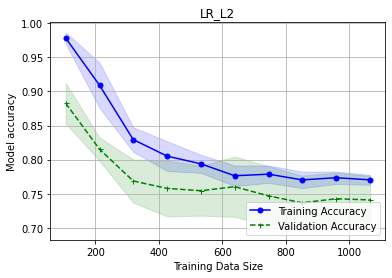

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


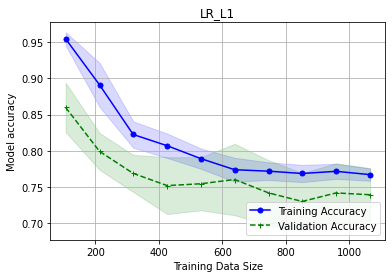

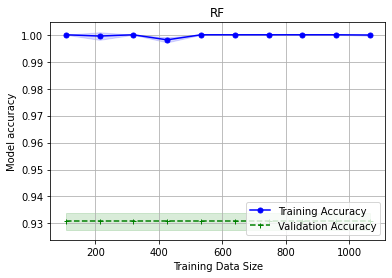

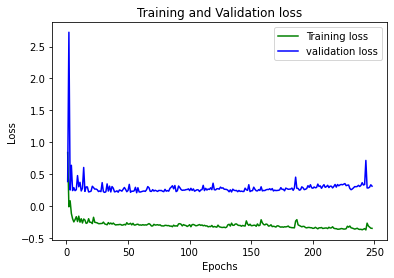

In [ ]:
get_loss_curves(X_train, y_train, y_test)

### Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', n_jobs=-1)
X_train, y_train = smote.fit_resample(X_train, y_train)

### Model Engineering Techniques

#### Grid Search

In [ ]:
# Make a dictionary of our five untrained models
def make_models(X_train):  
  return {
      'LR_L2': LogisticRegression(random_state=0, C=10.0, class_weight='balanced', penalty="l1", solver = "saga"),
      'LR_L1': LogisticRegression(random_state=0, C=1.0, class_weight='balanced', penalty="l2", solver = "newton-cg"),
      'RF': RandomForestClassifier(n_estimators=40, min_samples_split=6, min_samples_leaf=5, max_features='sqrt', max_depth=10, criterion='entropy', class_weight='balanced'),
      'Neural Network': keras.Sequential([
      keras.layers.Flatten(input_shape=(X_train.shape[1],)),
      keras.layers.Dense(2048, activation=tf.nn.relu),
      keras.layers.Dense(512, activation=tf.nn.relu),
      keras.layers.Dense(64, activation=tf.nn.relu),
      keras.layers.Dense(1, activation=tf.nn.sigmoid),])
  }

#### Feature Engineering

##### Algorithmic method

In [ ]:
# from sklearn.feature_selection import f_classif
# Create a list of F-values for the existing features
feature_F_scores, _ = f_classif(X_train, y_train)

# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train.columns):
  for f2_index, f2 in enumerate(X_train.columns[f1_index + 1:]):
    # Multiply the two features to create a new feature
    new_feature = X_train[[f1]].multiply(X_train[f2], axis=0)
    # Evaluate F-value of new feature
    F_Score_new, p_value_new = f_classif(new_feature, y_train)
    # Evaluate the relative improvement of the new feature
    F_score_improvement = F_Score_new[0] / max(feature_F_scores[[f1_index, f2_index]])
    # Print out features that is sufficiently improved 
    if F_score_improvement >= 1.5 and F_Score_new[0] >= 75 and p_value_new < 0.05:
        '''Note that F_score_improvement >= 1.5 and F_Score_new[0] >= 75 is
         relatively arbitrary, and that other values could be used.'''
        print(f'{f1} + {f2} has an F-score of {F_Score_new[0]:.2f}')
        print(f'\tBetter by a factor of {F_score_improvement:.2f} over features in isolation')
        print(f'\tThe result is significant (p = {p_value_new})')


age + n_injuries has an F-score of 155.32
	Better by a factor of 213.39 over features in isolation
	The result is significant (p = [1.69142631e-34])
age + position_MF has an F-score of 336.17
	Better by a factor of 7.08 over features in isolation
	The result is significant (p = [5.44679001e-70])


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


goals + position_MF has an F-score of 123.23
	Better by a factor of 3.67 over features in isolation
	The result is significant (p = [6.74473744e-28])
passes_completed + through_balls has an F-score of 94.92
	Better by a factor of 1.78 over features in isolation
	The result is significant (p = [5.47105917e-22])
passes_completed + position_MF has an F-score of 318.29
	Better by a factor of 16.78 over features in isolation
	The result is significant (p = [1.34091481e-66])
passes + through_balls has an F-score of 93.38
	Better by a factor of 2.72 over features in isolation
	The result is significant (p = [1.15641079e-21])
passes + n_injuries has an F-score of 81.29
	Better by a factor of 1.78 over features in isolation
	The result is significant (p = [4.12853777e-19])
passes + position_MF has an F-score of 327.25
	Better by a factor of 10.86 over features in isolation
	The result is significant (p = [2.65809149e-68])
passes_total_distance + through_balls has an F-score of 103.35
	Better by

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


tackles_won + n_injuries has an F-score of 197.99
	Better by a factor of 6.20 over features in isolation
	The result is significant (p = [4.01059851e-43])
tackles_won + position_MF has an F-score of 134.22
	Better by a factor of 4.21 over features in isolation
	The result is significant (p = [3.60113461e-30])
dribble_tackles + position_MF has an F-score of 157.33
	Better by a factor of 4.93 over features in isolation
	The result is significant (p = [6.5781682e-35])
dribbled_past + position_MF has an F-score of 200.33
	Better by a factor of 26.88 over features in isolation
	The result is significant (p = [1.36563457e-43])
blocks + position_MF has an F-score of 218.72
	Better by a factor of 12.88 over features in isolation
	The result is significant (p = [2.96176276e-47])
interceptions + position_MF has an F-score of 234.74
	Better by a factor of 17.73 over features in isolation
	The result is significant (p = [2.01324435e-50])
clearances + position_MF has an F-score of 212.61
	Better by

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

In [ ]:
# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train.columns):
  for f2_index, f2 in enumerate(X_train.columns[f1_index + 1:]):
    # Multiply the two features to create a new feature
    new_feature = X_train[[f1]].multiply(X_train[f2], axis=0)
    
    new_feature_ser = new_feature.iloc[:,0]
    corr_val = new_feature_ser.corr(y_train)

    # Evaluate F-value of new feature
    F_Score_new, p_value_new = f_classif(new_feature, y_train)
    if corr_val > 0.2 and p_value_new < 0.05:
        print(f'{f1} + {f2} has a correlation of {corr_val:.2f} with the target feature')
        print(f'\tThe result is significant (p = {p_value_new})')


age + n_injuries has a correlation of 0.30 with the target feature
	The result is significant (p = [1.79982159e-48])
age + n_severe_injuries has a correlation of 0.25 with the target feature
	The result is significant (p = [5.20690426e-33])


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


shots + n_injuries has a correlation of 0.22 with the target feature
	The result is significant (p = [7.24495281e-28])


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


passes_completed + n_injuries has a correlation of 0.23 with the target feature
	The result is significant (p = [2.44912207e-28])
passes + n_injuries has a correlation of 0.25 with the target feature
	The result is significant (p = [8.30549028e-35])
passes + n_severe_injuries has a correlation of 0.22 with the target feature
	The result is significant (p = [4.7607806e-27])
passes_short + n_injuries has a correlation of 0.27 with the target feature
	The result is significant (p = [2.70536573e-41])
passes_short + n_severe_injuries has a correlation of 0.24 with the target feature
	The result is significant (p = [2.93754762e-32])
passes_live + n_injuries has a correlation of 0.24 with the target feature
	The result is significant (p = [2.41587475e-31])
passes_live + n_severe_injuries has a correlation of 0.22 with the target feature
	The result is significant (p = [1.14075677e-25])
passes_dead + n_injuries has a correlation of 0.24 with the target feature
	The result is significant (p = [

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


tackles + n_injuries has a correlation of 0.26 with the target feature
	The result is significant (p = [3.94922129e-36])
tackles + n_severe_injuries has a correlation of 0.23 with the target feature
	The result is significant (p = [4.16188594e-29])
tackles_won + n_injuries has a correlation of 0.25 with the target feature
	The result is significant (p = [2.03079506e-34])
tackles_won + n_severe_injuries has a correlation of 0.23 with the target feature
	The result is significant (p = [1.75047402e-28])
touches + n_injuries has a correlation of 0.28 with the target feature
	The result is significant (p = [5.39319008e-42])
touches + n_severe_injuries has a correlation of 0.24 with the target feature
	The result is significant (p = [4.81540837e-32])
touches_live_ball + n_injuries has a correlation of 0.28 with the target feature
	The result is significant (p = [5.36728247e-42])
touches_live_ball + n_severe_injuries has a correlation of 0.24 with the target feature
	The result is significant

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

##### Final selection

In [ ]:
def new_feature_combos(X):
    X_new = X.copy()
    
    # Correlation of 0.3
    X_new['n_injuries * age'] = X_new.n_injuries * X_new.age

    # Correlation of 0.28
    X_new['n_injuries * touches'] = X_new.n_injuries * X_new.touches
    
    # Correlation of 0.29
    X_new['n_injuries * miscontrols'] = X_new.n_injuries * X_new.miscontrols

    return X_new

X_train = new_feature_combos(X_train)
X_test = new_feature_combos(X_test)
X_val = new_feature_combos(X_val)

#### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selectk = SelectKBest(k=15)
X_new_train = selectk.fit(X_train, y_train)
X_new_train.transform(X_train)
new_cols = X_new_train.get_feature_names_out()


X_train = X_train[new_cols]
X_test = X_test[new_cols]
X_val = X_val[new_cols]

# select_features = SelectKBest(f_classif, k=15)
# select_features = select_features.fit(X_train_scaled, y_train)

# # Get mask of columns that have good features
# feature_mask = select_features.get_support()
# X_train_fe.columns[feature_mask]

# # select features
# X_train_scaled_fs = X_train_scaled.iloc[:, feature_mask]
# X_test_scaled_fs = X_test_scaled.iloc[:, feature_mask]
# X_val_scaled_fs = X_val_scaled.iloc[:, feature_mask]

In [ ]:
all_models, history = fit_and_score_model(all_models, 'Engineered', X_train, X_test, y_train, y_test, X_val, y_val, 0.5)
all_models.loc[:, 'Engineered', :].head()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LR_L2 achieved a precision of 0.181 and recall of 0.857.LR_L2 achieved a ROC_AUC of 0.726 and score of 0.519.
LR_L1 achieved a precision of 0.182 and recall of 0.571.LR_L1 achieved a ROC_AUC of 0.652 and score of 0.377.
RF achieved a precision of 0.184 and recall of 0.400.RF achieved a ROC_AUC of 0.608 and score of 0.292.
12/12 [==============================] - 0s 4ms/step
Neural Network achieved a precision of 0.161 and recall of 0.286.Neural Network achieved a ROC_AUC of 0.608 and score of 0.224.


,,Precision,Recall,Score,ROC AUC,Model
model names,technique,,,,,
LR_L2,Engineered,0.180723,0.857143,0.518933,0.726190,"LogisticRegression(C=10.0, class_weight='balan..."
LR_L1,Engineered,0.181818,0.571429,0.376623,0.651786,"LogisticRegression(class_weight='balanced', ra..."
RF,Engineered,0.184211,0.400000,0.292105,0.607738,"(DecisionTreeClassifier(criterion='entropy', m..."
Neural Network,Engineered,0.161290,0.285714,0.223502,0.607738,<keras.engine.sequential.Sequential object at ...


#### Feature Scaling (yields worse results for some reason, don't run this)

In [ ]:
from sklearn.preprocessing import StandardScaler

technique_name = 'Scaling'

def standardize_data(X_train, X_out_of_sample, X_val):
    """standardizes all of the data in X_train and X_out_of_sample. The mean and
    standard deviation of each feature (i.e., each column) from the X_train
    data is used to standardize both the X_train and X_out_of sample."""

    X_train_standardized = X_train.copy()
    X_out_of_sample_standardized = X_out_of_sample.copy()
    X_val_standardized = X_val.copy() 

    scaler = StandardScaler()
    
    '''Use scaler to standardize your data. You'll need to fit scaler with your
    training data (use the fit method) and standardize your training and 
    out-of-sample data (use the transform method)'''

    scaler.fit(X_train) 
    X_train_standardized = scaler.transform(X_train_standardized)
    X_out_of_sample_standardized = scaler.transform(X_out_of_sample_standardized)
    X_val_standardized = scaler.transform(X_val_standardized)

    return X_train_standardized, X_out_of_sample_standardized, X_val_standardized, scaler

# Make new data that is scaled
X_train, X_test, X_val, scaler = standardize_data(X_train, X_test, X_val)

### Final Engineered Model

In [ ]:
all_models, history = fit_and_score_model(all_models, 'Engineered', X_train, X_test, y_train, y_test, X_val, y_val, 0.5)
all_models.loc[:, 'Engineered', :].head()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LR_L2 achieved a precision of 0.187 and recall of 0.657.LR_L2 achieved a ROC_AUC of 0.680 and score of 0.422.
LR_L1 achieved a precision of 0.189 and recall of 0.657.LR_L1 achieved a ROC_AUC of 0.681 and score of 0.423.
RF achieved a precision of 0.333 and recall of 0.200.RF achieved a ROC_AUC of 0.579 and score of 0.267.
12/12 [==============================] - 0s 4ms/step
Neural Network achieved a precision of 0.154 and recall of 0.057.Neural Network achieved a ROC_AUC of 0.579 and score of 0.105.


,,Precision,Recall,Score,ROC AUC,Model
model names,technique,,,,,
LR_L2,Engineered,0.186992,0.657143,0.422067,0.679762,"LogisticRegression(C=10.0, class_weight='balan..."
LR_L1,Engineered,0.188525,0.657143,0.422834,0.681250,"LogisticRegression(class_weight='balanced', ra..."
RF,Engineered,0.333333,0.200000,0.266667,0.579167,"(DecisionTreeClassifier(criterion='entropy', m..."
Neural Network,Engineered,0.153846,0.057143,0.105495,0.579167,<keras.engine.sequential.Sequential object at ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

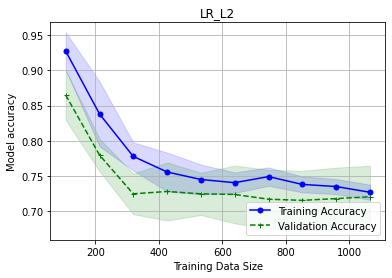

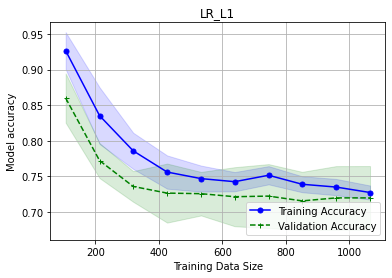

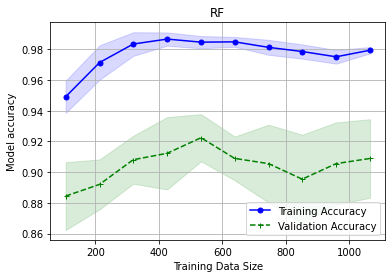

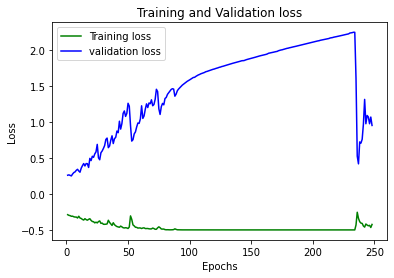

In [ ]:
get_loss_curves(X_train, y_train, y_test)

# Appendix (Grid Search)

In [ ]:
"""Remember this is training a CART tree for every combination of parameters
in the list params_to_search... this might take 10 to 20 seconds to run :)"""

# Dictionary of parameters to search
params_to_search = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'max_features': ['auto', 'log2', None],
    'class_weight': ['balanced', None],
}

# Initialize a model
mdl = DecisionTreeClassifier(random_state=0)
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, scoring = ['recall', 'precision'], refit=False, cv=5)
# Run the grid search
optimized_dt.fit(X_train, y_train)

cv_result_df = pd.DataFrame(optimized_dt.cv_results_)
cv_result_df['mean_test_score'] = (cv_result_df['mean_test_recall'] + cv_result_df['mean_test_precision'])/2
highest_mean_score_index = cv_result_df.mean_test_score.argmax()

# Get the average precision from the testing sets in cross-validation
mean_test_precision = optimized_dt.cv_results_['mean_test_precision']
mean_test_recall = optimized_dt.cv_results_['mean_test_recall']

print(f'The best model has a score of {cv_result_df.mean_test_score.max():.3f}')
print(f'The best model has the parameters {cv_result_df.params.loc[highest_mean_score_index]}')

# Find the model with the highest sum of precision and recall
params = optimized_dt.cv_results_['params']
best_model_params_index = (mean_test_precision + mean_test_recall).argmax()
best_model_params = params[best_model_params_index]

# Initialize the model 
best_model = DecisionTreeClassifier(random_state=0, **best_model_params)
'''Note, the ** from above allows us to use a dictionary to set 
the parameters of a function'''

# # Fit the model on the ENTIRE training set 
best_model.fit(X_train, y_train)

# Evaluate model precision, recall, and score
model_precision = precision_score(y_test, best_model.predict(X_test))  # evaluate precision on test set
model_recall = recall_score(y_test, best_model.predict(X_test))  # evaluate recall on test set
model_score = (model_precision + model_recall) / 2

# Add model scores to all_models data frame
all_models.loc['CART', 'Grid Search'] = (model_precision, model_recall, model_score, best_model)
all_models


"""Remember this is training a CART tree for every combination of parameters
in the list params_to_search... this might take 10 to 20 seconds to run :)"""

# Dictionary of parameters to search
params_to_search = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'max_features': ['auto', 'log2', None],
    'class_weight': ['balanced', None],
}






In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize data frame for scaled data
X_train_standardized = X_train.copy()
X_out_of_sample_standardized = X_test.copy()

# Define scaling function
scaler = StandardScaler()

'''Use scaler to standardize your data. You'll need to fit scaler with your
training data (use the fit method) and standardize your training and 
out-of-sample data (use the transform method)'''
# -------------------------------------------------------------------------

# Scale the X features      
scaler.fit(X_train)
X_train_standardized.loc[:]  = scaler.transform(X_train)
X_out_of_sample_standardized.loc[:] = scaler.transform(X_test)

params_to_search = {
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear', 'saga'],
    'max_iter' : [1, 10, 100, 1000, 250, 2500, 5000]
    }

# Initialize a model
mdl = LogisticRegression(penalty="l1")
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, refit=False, cv=5, verbose=0)
# Run the grid search
optimized_dt.fit(X_train_standardized, y_train)

print(optimized_dt.best_params_)